In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
print(os.getcwd())

C:\Users\Dell\Videos\data science\New folder


In [3]:
#importing the data
filename = ["mini_newsgroups"]
i = 0
l = []
names = []
for f in filename:
    for folder in os.listdir(f"{f}/{f}"):
        names.append(folder)
        for file in os.listdir(f"{f}/{f}/{folder}"):
            a = open(f"{f}/{f}/{folder}/{file}","r+")
            l.append([a.read(), folder])
            a.close()

In [4]:
l = np.array(l)

In [5]:
x_train, x_test = train_test_split(l, random_state = 1)

In [6]:
flat_list=[word for line in x_train[0][0] for word in line.split()]

In [7]:
x_train[0][0]

'Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!sol.ctr.columbia.edu!ira.uka.de!math.fu-berlin.de!ifmsun8.ifm.uni-hamburg.de!rzsun2.informatik.uni-hamburg.de!fbihh!bontchev\nFrom: bontchev@fbihh.informatik.uni-hamburg.de (Vesselin Bontchev)\nSubject: Re: text of White House announcement and Q&As on clipper chip encryption\nMessage-ID: <bontchev.734981805@fbihh>\nSender: news@informatik.uni-hamburg.de (Mr. News)\nReply-To: bontchev@fbihh.informatik.uni-hamburg.de\nOrganization: Virus Test Center, University of Hamburg\nReferences: <C5L17v.GH5@dove.nist.gov>\nDistribution: na\nDate: Fri, 16 Apr 1993 17:36:45 GMT\nLines: 268\n\nclipper@csrc.ncsl.nist.gov (Clipper Chip Announcement) writes:\n\n> The President today announced a new initiative that will bring\n> the Federal Government together with industry in a voluntary\n> program to improve the security and privacy of telephon

In [8]:
#experimental code to just check a few thing 
listi = [word for word in x_train[0][0].split(' ')]
# listi

In [9]:
stopwords = set([u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', 
u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', 
u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', 
u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be',
u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing',
u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until',
u'while', u'of', u'at'])

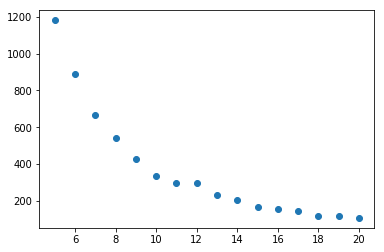

In [10]:
#preparing vocabulary
vocab = {}
for file in x_train:
    words = []
    for a in re.split(';|,|\n|:',file[0]) :
        for word in a.strip().replace(".","").split(' '):
            words.append(word)
    for word in words:
        word = word.lower()
        if word in stopwords:
            continue
        if word in vocab.keys():
            vocab[word] += 1
        else :
            vocab[word] = 1


#just an experiment to see the pattern in the frequency of words 
freq = []
for key in vocab.keys():
    freq.append(vocab[key])
    
freq_dict ={}
for fr in freq:
    if fr in freq_dict.keys():
        freq_dict[fr] += 1
    else :
        freq_dict[fr] = 1
        
x_list = []
y_list = []
for key in freq_dict.keys():
    if key < 5 or key > 20 :
        continue
    x_list.append(key)
    y_list.append(freq_dict[key])
    
plt.scatter(x_list,y_list)
plt.show()

In [11]:
len(vocab.keys())

59006

In [12]:
#to remove the words whose frequency is very less and which would not make up to be good feature
to_remove = []
for key in vocab.keys():
    # Different values can be tried here 
    if vocab[key] < 10:
        to_remove.append(key)

for key in to_remove:
    del vocab[key]
    
print(len(vocab.keys()))

4418


In [13]:
word_order = [key for key in vocab.keys()]
len(word_order)

4418

In [14]:
df = pd.DataFrame(np.zeros(shape = (len(x_train), len(word_order)))  , columns = word_order)

In [15]:
df.shape

(1499, 4418)

In [16]:
#creating the dataset
for i in range(len(x_train)):
    file = x_train[i]
    words = []
    for a in re.split(';|,|\n|:',file[0]) :
        for word in a.strip().replace(".","").split(' '):
            words.append(word)
    for word in words:
        word = word.lower()
        if word not in vocab.keys():
            continue
        df.at[i,word] += 1
        

In [17]:
# df.loc[:,"formatted"].sum()

In [18]:
print(names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [19]:
(x_train[: ,1] == 'alt.atheism').sum()
print(df.sum().sum())

351118.0


In [20]:
#building our data in a python dictionary structure in order to perform the naive bayes algo on the test_data efficiently 
output = {}
for label in names : 
    output[label] = {}
    df_temp = df[x_train[:,1] == label]
    tot = df_temp.sum().sum()
    output[label]["tot_words_present"] = tot
    output[label]["size_of_the_label"] = df_temp.shape[0]
    for word in vocab.keys():
        output[label][word] = df_temp.loc[:,word].sum()

# prediction using naive bayes
y_pred = []
for file in x_test:
    words = []
    for a in re.split(';|,|\n|:',file[0]) :
        for word in a.strip().replace(".","").split(' '):
            words.append(word)
    maxi = -5000000
    pred = ""
    for label in names:
        prob = np.log(output[label]["size_of_the_label"]) - np.log(df.shape[0])
        for word in words:
            word = word.lower()
            if word not in vocab.keys():
                continue
            numer = output[label][word] + 1
            denum = output[label]["tot_words_present"] + len(vocab.keys())
            prob += np.log(numer) - np.log(denum)
            
        if prob > maxi:
            pred = label
            maxi = prob
    
    y_pred.append(pred)

In [21]:
accuracy_score(x_test[:,1],y_pred)

0.716

In [22]:
# some newsgroups were in the format such that the that they had subgroups
# for example sci.space and sci.med , although both are different newsgroup but are under a main umbrella i.e science 
# so i tested the accuracy of predicting the correct overhead topic and turns out it is better than the actual accuracy 
# this means that(lets say) if article of sci.space does not get classified correctly it has higher probablity to get
# classified as sci.med than some other random newsgroup 
a = [label.split('.')[0] for label in x_test[:,1]]
b = [label.split('.')[0] for label in y_pred]

In [23]:
accuracy_score(a,b)

0.838

In [24]:
y_pred

['misc.forsale',
 'talk.politics.guns',
 'rec.autos',
 'misc.forsale',
 'talk.politics.guns',
 'misc.forsale',
 'talk.politics.guns',
 'comp.sys.mac.hardware',
 'soc.religion.christian',
 'rec.motorcycles',
 'talk.religion.misc',
 'soc.religion.christian',
 'talk.politics.guns',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'comp.os.ms-windows.misc',
 'comp.os.ms-windows.misc',
 'sci.med',
 'rec.motorcycles',
 'comp.os.ms-windows.misc',
 'talk.politics.misc',
 'rec.autos',
 'rec.sport.baseball',
 'talk.politics.mideast',
 'comp.sys.ibm.pc.hardware',
 'misc.forsale',
 'comp.sys.ibm.pc.hardware',
 'rec.autos',
 'comp.os.ms-windows.misc',
 'sci.med',
 'talk.politics.guns',
 'comp.sys.mac.hardware',
 'rec.autos',
 'comp.windows.x',
 'rec.sport.hockey',
 'talk.politics.mideast',
 'talk.religion.misc',
 'talk.politics.guns',
 'soc.religion.christian',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'sci.crypt',
 'rec.sport.hockey',
 'talk.religion.misc',
 'ta

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf = MultinomialNB()

In [65]:
clf.fit(df,x_train[:,1])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
df_test = pd.DataFrame(np.zeros(shape = (len(x_test), len(word_order)))  , columns = word_order)
for i in range(len(x_test)):
    file = x_test[i]
    words = []
    for a in re.split(';|,|\n|:',file[0]) :
        for word in a.strip().replace(".","").split(' '):
            words.append(word)
    for word in words:
        word = word.lower()
        if word not in vocab.keys():
            continue
        df_test.at[i,word] += 1 

In [67]:
y_pred_sk = clf.predict(df_test)

In [68]:
accuracy_score(x_test[:,1],y_pred_sk)

0.698

#### Got exactly same accuracy using sklearn multinomial naive bayes classifier and our own programmed classifier

There were two datasets available on the website, one with 2,000 articles and the other with 20,000 because of computational power constrained, smaller dataset was choosen but the larger dataset would have resulted in better accuracy 
